<p align="center">
<img src="https://github.com/adelnehme/machine-learning-with-scikit-learn-live-training/blob/master/assets/dc_amazon_logo.png?raw=True" alt = "DataCamp icon" width="50%">
</p>


## **Data UpSkilling Learning Club: Introduction to Machine Learning with Python**

<br>

#### **Key Session Takeaways**

- Understand the different types of machine learning and when to use them
- Know when machine learning is applicable and when it’s not
- A discussion on the different components of the machine learning workflow
- Apply a simple supervised learning workflow to classify customer churn

<br>

#### **The Dataset**

The dataset to be used in this session is a CSV file named `telco.csv`, which contains data on telecom customers churning and some of their key behaviors. It contains the following columns:

**Features**:

- `customerID`: Unique identifier of a customer.
- `gender`: Gender of customer.
- `SeniorCitizen`: Binary variable indicating if customer is senior citizen.
- `Partner`: Binary variable if customer has a partner.
- `Dependents`: Binary variable if customer has dependent.
- `tenure`: Number of weeks as a customer.
- `PhoneService`: Whether customer has phone service.
- `MultipleLines`: Whether customer has multiple lines.
- `InternetService`: What type of internet service customer has (`"DSL"`, `"Fiber optic"`, `"No"`).
- `OnlineSecurity`: Whether customer has online security service.
- `OnlineBackup`: Whether customer has online backup service.
- `DeviceProtection`: Whether customer has device protection service.
- `TechSupport`: Whether customer has tech support service.
- `StreamingTV`: Whether customer has TV streaming service.
- `StreamingMovies`: Whether customer has movies streaming service.
- `Contract`: Customer Contract Type (`'Month-to-month'`, `'One year'`, `'Two year'`).
- `PaperlessBilling`: Whether paperless billing is enabled.
- `PaymentMethod`: Payment method.
- `MonthlyCharges`: Amount of monthly charges in $.
- `TotalCharges`: Amount of total charges so far.

**Target Variable**:

- `Churn`: Whether customer `'Stayed'` or `'Churned'`.


## **Data Import & Cleaning**

In [ ]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [ ]:
# Read in dataset
telco = pd.read_csv('https://raw.githubusercontent.com/adelnehme/machine-learning-with-scikit-learn-live-training/master/data/telco_churn.csv')
pd.set_option('display.max_columns', None)

In [ ]:
# Print header
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,Stayed
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Churned


- **Observation 1:** For the purposes of machine learning, the `customerID` doesn't have any predictive power and will be dropped.
- **Observation 2:** Categorical variables need to be encoded as numeric for machine learning.
- **Observation 3:** Numerical columns need to be scaled to have the same range.

In [ ]:
# Print info
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


The **null model** is a model of reference to use for classification accuracy - where the  **null accuracy** is the accuracy of the model if we always choose the most frequent class *(or outcome)*. Accuracy is determined here by the following:

<br>


$$\large{accuracy = \frac{\# \space times \space model \space is \space right}{total \space number \space of \space predictions}}$$



In [ ]:
# Find the null model
telco['Churn'].value_counts()

Stayed     5174
Churned    1869
Name: Churn, dtype: int64

$$\large{null \space accuracy = \frac{\# \space times \space model \space predicted \space "Stayed"}{total \space number \space of \space predictions}}$$

In [ ]:
# Find the null model
telco['Churn'].value_counts() / len(telco)

Stayed     0.73463
Churned    0.26537
Name: Churn, dtype: float64

In this particular instance, the null model (always predicting `"Stayed"`) is 73.4% - and any meaningful model that improves performance will have to break that accuracy score. 

In [ ]:
# Drop customer ID column
telco.drop('customerID', axis = 1, inplace = True)

---
<center><h1> Q&A 1</h1> </center>

---

## **Exploratory Analysis for Machine Learning**

In order to understand which features have predictive power, which variables to use in feature engineering, and to build a common sense understanding of what is driving churn to understand results, it essential to explore the data and observe how **features** interact with the **target** variable. To make this analysis convenient, we will isolate features between:

- Numeric columns _(e.g., Age)_
- Categorical columns _(e.g., Marriage Status)_

In [ ]:
# Grab a look at the header
telco.head()

#### **Isolating categorical and numeric column names**

We can get all the data types of a DataFrame using the `.dtypes` attribute.

In [ ]:
# Get dtypes of column
telco.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We can extract columns names from a DataFrame using the `.columns` attribute, and extract columns with specific data types using the `.select_dtypes()` method.

In [ ]:
# Get all feature names
features = telco.drop('Churn', axis = 1)
feature_names = features.columns
print(feature_names)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [ ]:
# Get categorical and numeric column names
categorical_names = features.select_dtypes('object').columns
numeric_names = features.select_dtypes(exclude = 'object').columns

> #### **Data Visualization Refresher** 
> 
> A `matplotlib` visualization is made of 3 components:
> - A **figure** which houses in one or many subplots (or axes).
> - The **axes** objects ~ the subplots within the figure.
> - The plot inside each subplot or axes.
>
> We can generate a figure with subplots using the following function:
>
> `fig, axes = plt.subplots(nrow, ncol)`
> 
> <p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/subplots.gif?raw=true" width="55%">
</p>


#### **Visualizing target variable (Churn) relationship with categorical features (columns)**

To visualize the count of different categorical values by `Churn`, we can use the `sns.countplot(x, hue, data, ax)` function which takes in:
- `x`: The column name being counted.
- `hue`: The column name used for grouping the data.
- `data`: The DataFrame being visualized.
- `ax`: Which axes in the figure to assign the plot.

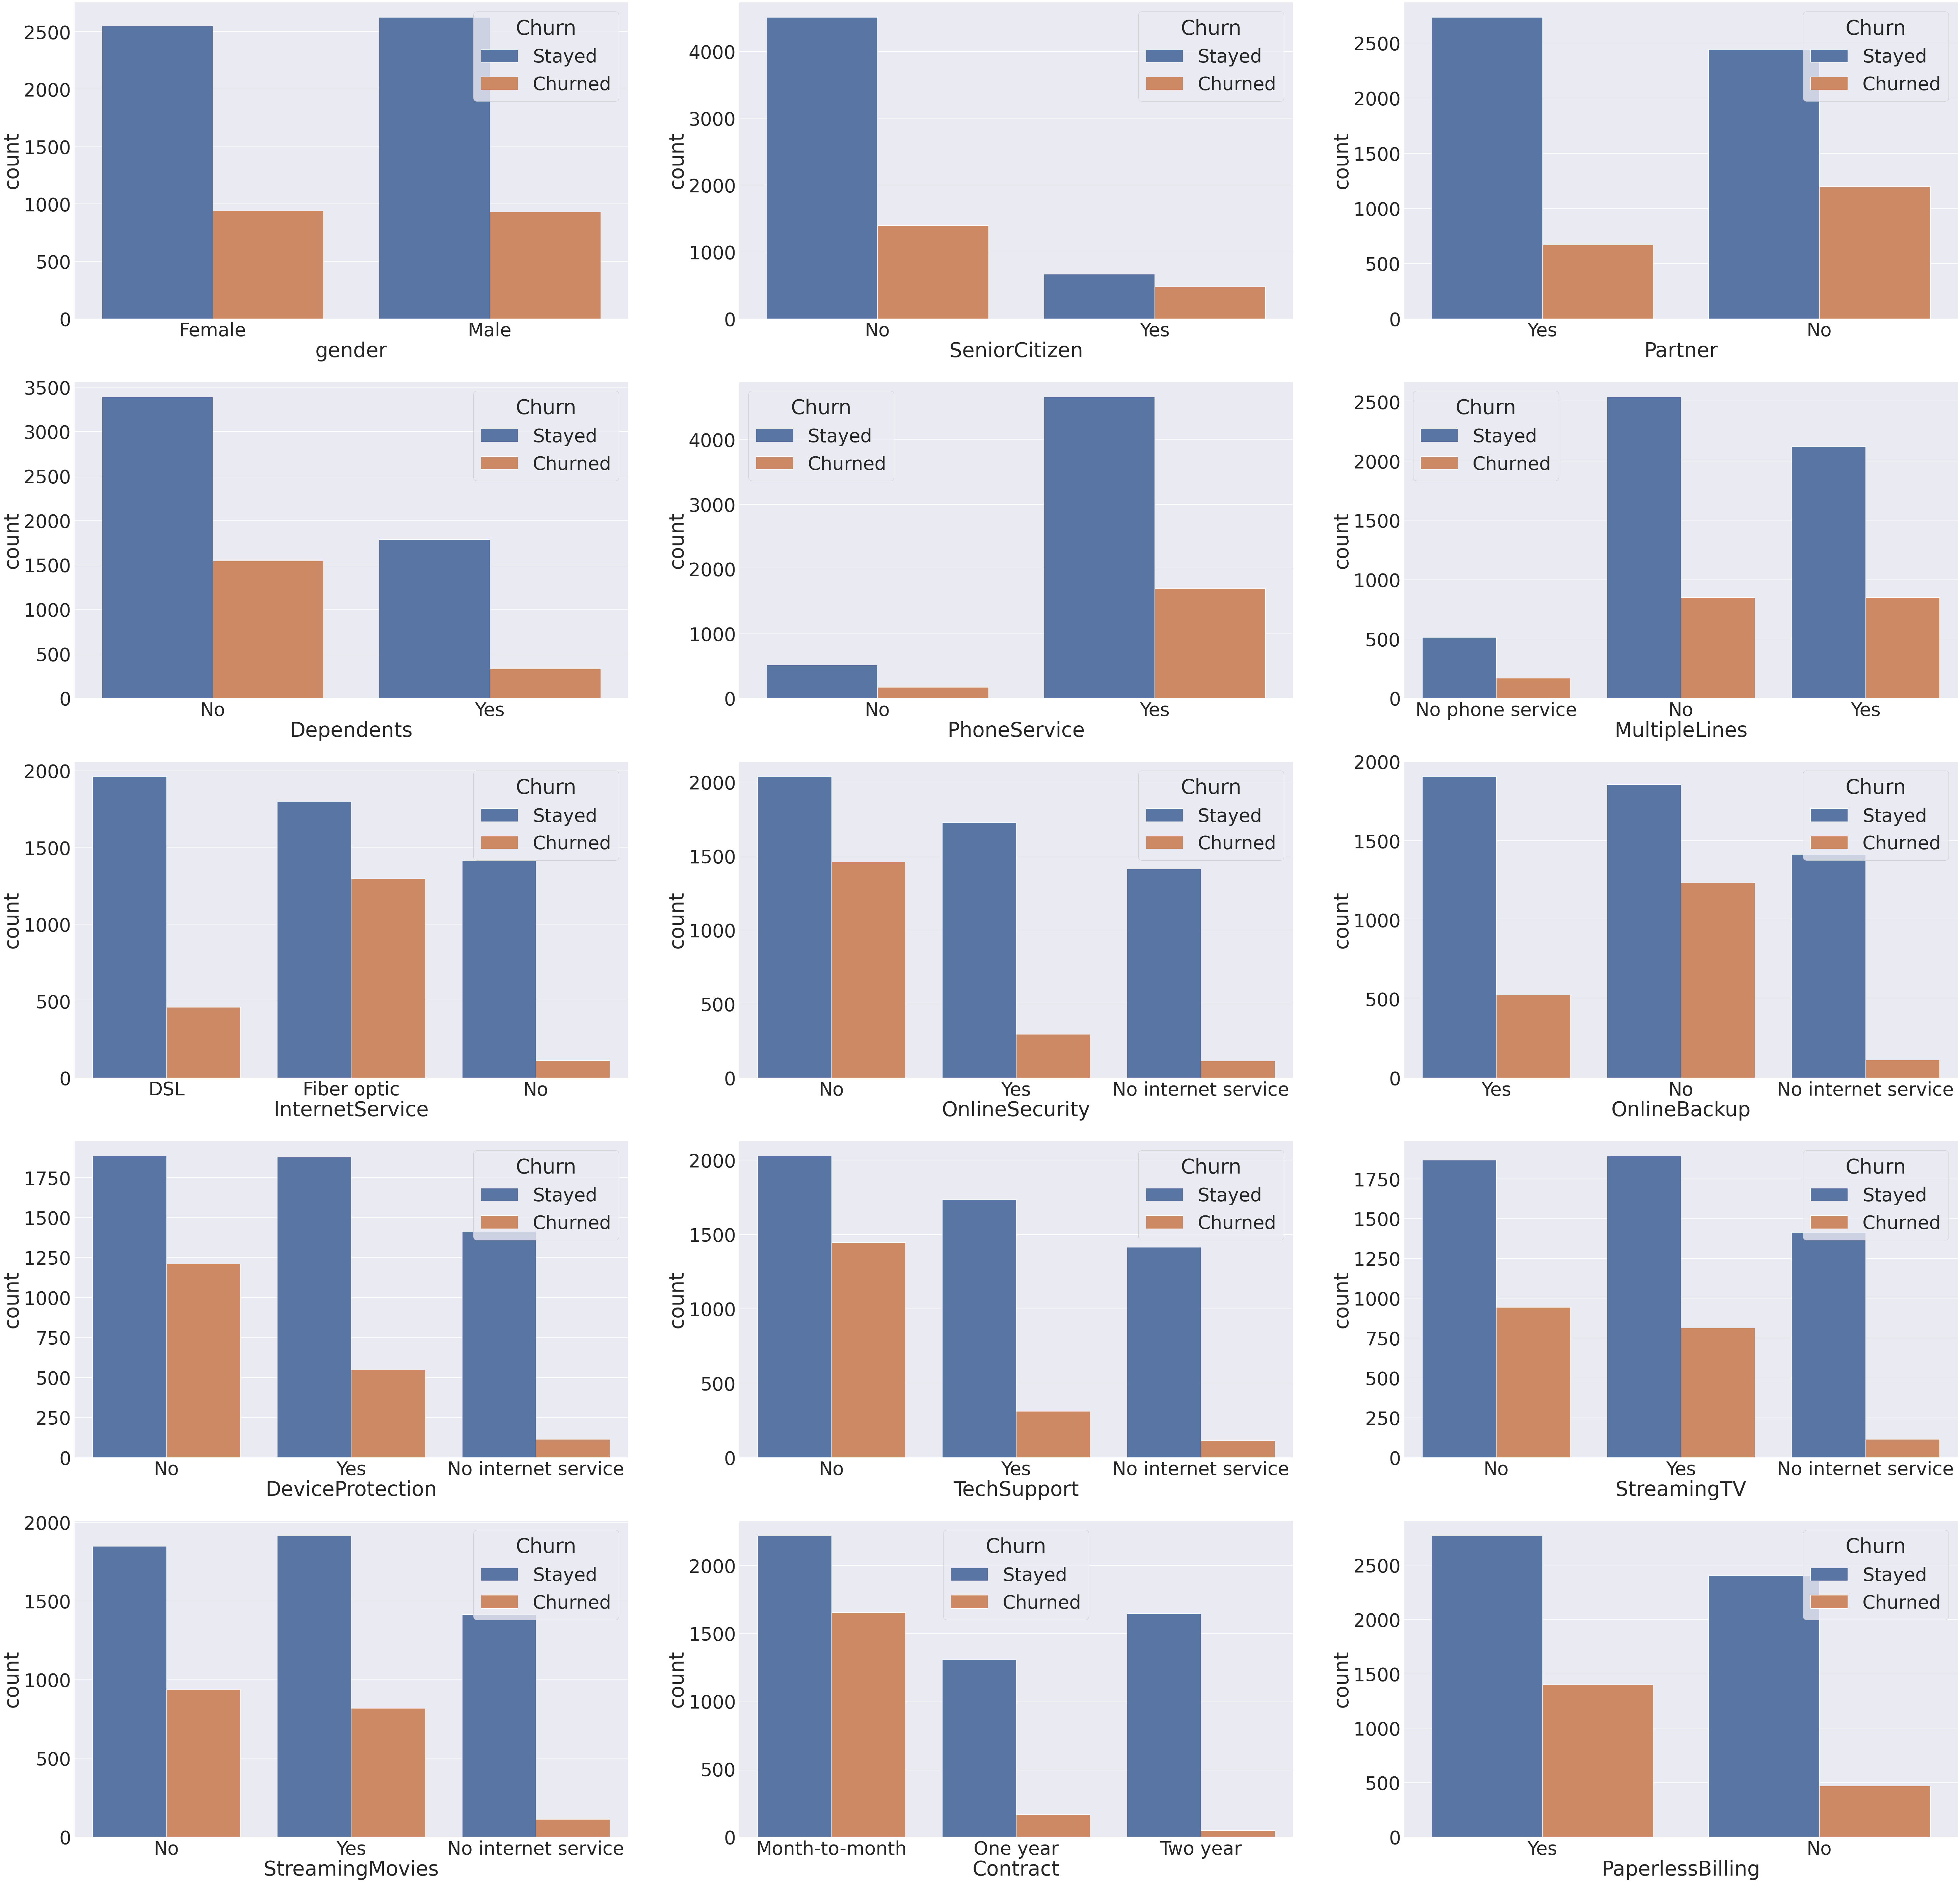

In [ ]:
# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 5
sns.set(font_scale=5) 

# Create figure and axes
fig, axes = plt.subplots(5, 3, figsize = (100, 100))

# Iterate over each axes, and plot a countplot with categorical columns
for ax, column in zip(axes.flatten(), categorical_names):
    
    # Create countplot
    sns.countplot(x = column, hue =  'Churn', data = telco, ax = ax)
    

**Observation 4:** `OnlineBackup`, `DeviceProtection`, `TechSupport` and `OnlineSecurity` users tend to churn less.

#### **Visualizing target variable relationship with continuous features**

A great way to observe the differences between two groups (or categories) of data according to a numeric value is a boxplot, which visualizes the following:

<p align="left">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>

It can be visusalized as such:

- `sns.boxplot(x=, y=, data=)`
  - `x`: Categorical variable we want to group our data by.
  - `y`: Numeric variable being observed by group.
  - `data`: The DataFrame being used.
  

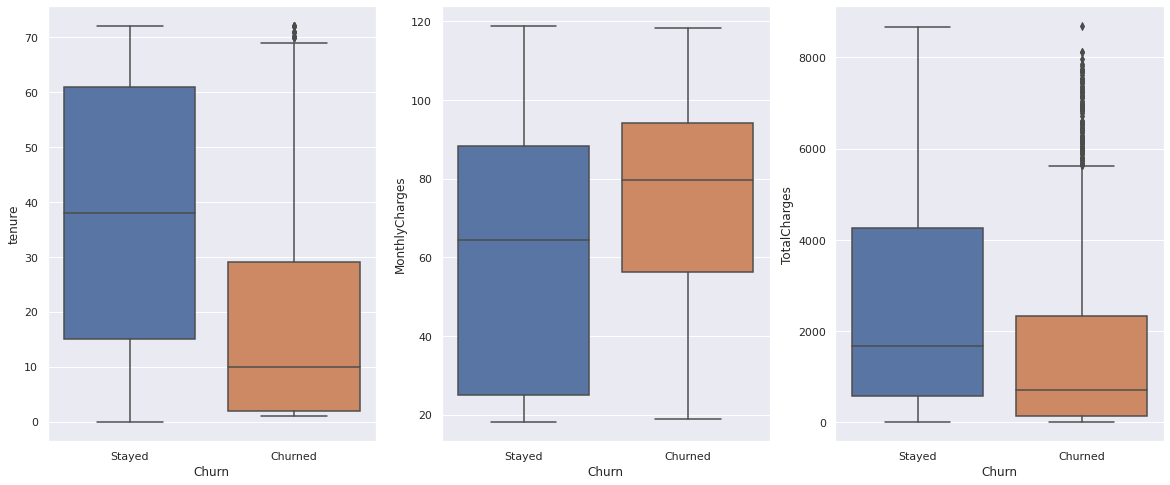

In [ ]:
# Setting aesthetics for better viewing
plt.rcParams["axes.labelsize"] = 1
sns.set(font_scale=1) 
 
# Create figure and axes
fig, axes = plt.subplots(1, 3, figsize = (20, 8))

# Iterate over each axes, and plot a boxplot with numeric columns
for ax, column in zip(axes.flatten(), numeric_names):
    
    # Create a boxplot
    sns.boxplot(x = "Churn", y = column, data = telco, ax = ax)

**Observation 5:** Higher monthly charges tend to be related to Churn.

**Observation 6:** Tenure may seem predictive, but it could very well much be that churners have low tenure by nature because they are churning.

---
<center><h1> Q&A 2</h1> </center>

---

## **Data pre-processing for machine learning**

Many machine learning algorithms require data to be processed before being passed into an algorithm first - dependent on whether data is numeric or categorical, the processing strategy is different.


**Train-test split**

Since we have one DataFrame that is fully labelled, we want to evaluate accuracy on unseen data. To do so, we can split our data into Training data, i.e. the data that is trained on a Machine Learning algorithm with its labels, and test data, the data treated as "unseen data" used to evaluate the accuracy of our model.

<br>

<p align="center">
<img src="https://github.com/adelnehme/machine-learning-with-scikit-learn-live-training/blob/master/assets/telco.png?raw=true" width="68%">
</p>


<br>






In [ ]:
# Split data between X (features) and y (target)
X = features
y = telco['Churn'].replace({'Stayed': 0, 'Churned':1})

We can split features (`X`) and target (`y`) using the `train_test_split()` function from `sklearn.model_selection` — the arguments it takes are:

- `X`: The features 
- `y`: The target variable
- `test_size`: Size of the test set here `0.25`
- `random_state`: Takes in any number and allows to reproduce same split

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train test splits
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.25, random_state=123)



**Continuous or numeric data**

Many machine learning models make assumptions about the distribution of numeric features when modeling (most commonly data is assumed to be normally distributed). Also, many numeric columns have different scales _(e.g. Age vs Salary)_. 

A common way to process numeric columns is through **Standardization** - where we substract their mean and divide by their standard deviation so that their mean becomes centered around 0 and have a standard deviation of 1 :

<br>

$$\large{x_{scaled} = \frac{x - mean}{std}}$$

<br>

<p align="center">
<img src="https://github.com/datacamp/machine-learning-with-scikit-learn-live-training/blob/master/assets/standard_scaler.gif?raw=true?resize" width="45%">
</p>


<br>

We can do this easily in `sklearn` by using the `StandardScaler()` function. Many operations in `sklearn` fit the following `.fit()` $\rightarrow$ `.transform()` paradigm and `StandardScaler()` is no different:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on data
scaler.fit(df[my_column])

# Transformed
column_scaled = scaler.transform(df[my_column])

# Replace column
df[my_column] = column_scaled
```

However, it is very important to **first split** your data before scaling your features since we do not want to scale our data according to the distribution of both the training data and test data. Failing to do so results in **data leakage** and could lead to "too good to be true" results on testing data with relatively weaker results on unseen data. 

<font color=00AAFF>Ideally, scalers should be fit on **training data only** - and be used to transform both training and testing data.</font>

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Intialize a scaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(train_X[numeric_names])

# Transform training and test data
train_numeric_transform = scaler.transform(train_X[numeric_names])
test_numeric_transform = scaler.transform(test_X[numeric_names])

In [ ]:
# Replace columns in training and testing data accordingly
train_X[numeric_names] = train_numeric_transform
test_X[numeric_names] = test_numeric_transform

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
# See changes
train_X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6464,Male,Yes,No,No,0.707712,Yes,Yes,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),0.185175,0.513686
5707,Female,No,No,No,-1.248999,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,-0.641538,-0.979548
3442,Male,No,No,No,-0.148349,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1.133562,0.226798
3932,Female,Yes,No,No,-1.248999,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,0.458524,-0.950682
6124,Female,No,Yes,Yes,0.993065,Yes,No,DSL,Yes,No,Yes,Yes,No,No,One year,Yes,Mailed check,-0.183179,0.433822


**Categorical data**

While categorical variables like country, marriage status and more are easily interpretable by humans - they need to be properly encoded to be understood by machine learning algorithms. We will be using dummy encoding *(highly similar to one-hot encoding)* where categorical variables are converted to binary (`1`,`0`) columns to indicate whether they have a certain value or not. Note that, dummy encoding generates `n-1` categories. Using a country example - `0` on all columns encodes it as France.

<br>


<p align="center">
<img src="https://github.com/datacamp/machine-learning-with-scikit-learn-live-training/blob/master/assets/onehot_dummy.gif?raw=true" width="80%">
</p>

Using dummy encoding in `pandas` is actually very easy - we can use the `pd.get_dummies()` function which takes:

- The DataFrame being converted.
- `columns`: The name of the categorical columns to be converted.
- `drop_first`: Boolean to indicate onehot encoding (`False`) or dummy encoding (`True`).




In [ ]:
# One hot encode cat variables
train_X = pd.get_dummies(train_X, columns = categorical_names,  drop_first = True)
test_X = pd.get_dummies(test_X, columns = categorical_names,  drop_first = True)

In [ ]:
# See changes
train_X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6464,0.707712,0.185175,0.513686,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5707,-1.248999,-0.641538,-0.979548,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3442,-0.148349,1.133562,0.226798,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0
3932,-1.248999,0.458524,-0.950682,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
6124,0.993065,-0.183179,0.433822,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1


**Feature Engineering**

Generating new predictive features from existing features is an important aspect of machine learning. New features could be engineered using:

- Binning numeric values _(e.g. `age_category` column from `age` column)._
- Interaction of 2 columns _(e.g. `total_salary`/`tenure`)._
- Features from domain knowledge.

We learned while visualizing categorical columns that being subscribed to `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, and `TechSupport` tend to drive less churn. Let's visualize this further with a new feature called `in_ecosystem` which counts the number of services a given customer is subscribed to.


In [ ]:
# Service columns
service_columns = ['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes']

# Create in_ecosystem column
train_X['in_ecosystem'] = train_X[service_columns].sum(axis = 1)

# Create feature that is 1 if 2 or more services subscribed, 0 otherwise
train_X['in_ecosystem'] = np.where(train_X['in_ecosystem'] >= 2, 1 , 0)

# Apply the same on test_X
test_X['in_ecosystem'] = test_X[service_columns].sum(axis = 1)
test_X['in_ecosystem'] = np.where(test_X['in_ecosystem'] >= 2, 1 , 0)

In [ ]:
# See changes
train_X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,in_ecosystem
6464,0.707712,0.185175,0.513686,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
5707,-1.248999,-0.641538,-0.979548,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3442,-0.148349,1.133562,0.226798,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1
3932,-1.248999,0.458524,-0.950682,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
6124,0.993065,-0.183179,0.433822,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,1


---
<center><h1> Q&A 3</h1> </center>

---

## **Modeling**

Most machine learning models for classification aim at creating a decision boundary between data points to generate predictions. For example, here is a decision line where the target variable is whether tumor is benign or cancerous based on tumor height and width:

<br>

<p align="center">
<img src="https://github.com/datacamp/machine-learning-with-scikit-learn-live-training/blob/master/assets/decision_boundary.gif?raw=true?" width="50%">
</p>



#### **Using K-Nearest Neighbors to Generate Predictions**

The K-Nearest Neighbor tries to find the label of unseen data by choosing the label of the `K` closest points to it. Using our cancerous/benign tumour example, K-Nearest Neighbor would behave like this:


<br>

<p align="center">
<img src="https://github.com/datacamp/machine-learning-with-scikit-learn-live-training/blob/master/assets/knn.gif?raw=true?" width="50%">
</p>

Just like almost all algorithms on `sklearn` - the `KNeighborsClassifier()` needs to be instantiated and follows the `.fit()` $\rightarrow$ `.predict()` paradigm as such:

```
# Import algorithm
from sklearn.neighbors import KNeighborsClassifier

# Instantiate it
knn = KNeighborsClassifier(n_neighbors = k)

# Fit on training data
knn.fit(train_X, train_Y)

# Create predictions
predictions = knn.predict(test_X)
```

In [ ]:
# Import K-Nearest Neighbor Classifier and accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# Instantiate K Nearest Neighbors with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit on training data
knn.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = knn.predict(test_X)
pred_train_Y = knn.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Test accuracy: 0.7672
Train accuracy: 0.8364


---
<center><h1> Q&A 4</h1> </center>

---

#### **Hyperparameter Tuning and grid-search**

Almost all algorithms have hyperparameters that can be tuned to fine-tune their performance, and better capture the patterns in the dataset. Having a good understanding and intuition of how algorithms work is essential to fully utilize hyperparameter tuning for the purposes of improving model performance and testing different modeling strategies. 

**Tuning the number of neighbors**


In [ ]:
# Instantiate K Nearest Neighbors with 8 neighbors
knn = KNeighborsClassifier(n_neighbors = 8)

# Fit on training data
knn.fit(train_X, train_Y)

# Create Predictions
pred_test_Y = knn.predict(test_X)
pred_train_Y = knn.predict(train_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)
train_accuracy = accuracy_score(train_Y, pred_train_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))
print('Train accuracy:', round(train_accuracy, 4))

Test accuracy: 0.7723
Train accuracy: 0.8241


**Using grid-search**

Grid-search is a hyperparameter tuning algorithm that sequentially goes through every possible combination of hyperparameter combination it is fed in space. For example, for hyperparameters `parameter 1` and `parameter 2` - it would mean testing out all possible combinations of their values:


<p align="center">
<img src="https://github.com/datacamp/machine-learning-with-scikit-learn-live-training/blob/master/assets/grid-search.gif?raw=true" width="50%">
</p>


Grid-search can be done using the `GridSearchCV()` function - it takes in as arguments:

- The model being used.
- The possible parameters to test - inputted as a dictionary. 


In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params = {'n_neighbors': [4,6,8,10,12,14,16,18]}

# Instantiate a K Nearest Neighbor classifier 
knn = KNeighborsClassifier()

# Instantiate a GridSearch 
clf = GridSearchCV(knn, params)

# Fit clf on training data
clf.fit(train_X, train_Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [4, 6, 8, 10, 12, 14, 16, 18]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Generate predictions and calculate accuracy error
y_pred = clf.predict(test_X)
print('Best parameters: ', clf.best_params_)
print('\n',round(accuracy_score(y_pred, test_Y), 4))

Best parameters:  {'n_neighbors': 16}

 0.7768


---
<center><h1> Q&A 5</h1> </center>

---